### Observations
* Capomulin was the only treatment to cause a significant reduction in tumor volume after 45 days (19% decrease, mean = 36.236 mm3, sem = 1.224) compared to the placebo (51% increase, mean = 68.084 mm3, sem = 1.352).  The other two treatments did not reduce tumor volume after 45 days (Infubinol: 46% increase, mean = 65.756 mm3, sem = 1.144; Ketapril: 57% increase, mean = 70.663 mm3, sem = 1.453).
* Capomulin significantly decreased metastatic spread after 45 days (mean = 1.476 metastatic sites, sem = 0.203) compared to the placebo (mean = 3.273 metastatic sites, sem = 0.304). Infubinol caused a smaller but significant reduction on metastatic spread (mean = 2.111 metastatic sites, sem = 0.309).  Ketapril did not have a significant effect on metastatic spread (mean = 3.364 metatstatic sites, sem = 0.279) comparaed to the placebo.
* Capomulin had the best effect on mouse survival rate (84% survival rate) in a 45 day period compared to the placebo (44% survival rate).  The other two treatments did not improve mouse survival rate (Infubinol: 36% survival rate, Ketapril: 44% survival rate) in a 45 day period more than the placebo.

In [15]:
# Dependencies and setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the mouse and drug data and the clinical trial data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data_merge_df = pd.merge(clinical_trial_data_df, mouse_drug_data_df, on="Mouse ID", how="left")

# Display the data table for preview
data_merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


### Tumor Response to Treatment

In [16]:
# Store the mean tumor volume data grouped by drug and timepoint, and convert groupby object into dataframe
tumor_volume_mean_group = data_merge_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
tumor_volume_mean_df = tumor_volume_mean_group.to_frame()

# Preview dataframe
tumor_volume_mean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [17]:
# Store the standard error of tumor volumes grouped by drug and timepoint, and convert groupby object into dataframe
tumor_volume_sem_group = data_merge_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
tumor_volume_sem_df = tumor_volume_sem_group.to_frame()

# Preview dataframe
tumor_volume_sem_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [18]:
# Minor data munging to reformat the dataframes
tumor_volume_mean = tumor_volume_mean_df.unstack(level = 0)
tumor_volume_mean.columns = tumor_volume_mean.columns.get_level_values(1)

tumor_volume_sem = tumor_volume_sem_df.unstack(level = 0)
tumor_volume_sem.columns = tumor_volume_sem.columns.get_level_values(1)

# Preview that reformatting worked
tumor_volume_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


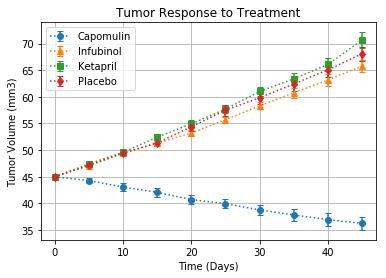

In [19]:
# Generate the plot (with error bars)
fig, ax = plt.subplots()

# Title and axis labels
ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

# X-axis
timepoint = tumor_volume_mean.index.tolist()
x_axis = np.arange(0, max(timepoint) + 5, 5)

# Y-axis
samples = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

# Setup
ticks = np.arange(0, max(timepoint) + 5, 10)
ax.set_xticks(ticks)
ax.set_xlim(-2, max(timepoint) + 2)
ax.grid()

count = 0
markers = ['o', '^', 's', 'd']

for s in samples:
    ax.errorbar(x_axis, tumor_volume_mean[s], tumor_volume_sem[s], linestyle = ':', 
                 marker =  markers[count], capthick = 1, capsize = 3)
    count += 1

ax.legend()

# Save the figure
plt.savefig("analysis/Treatment_Effects_on_Tumor_Volume.png")

# Show the figure
plt.show()

### Metastatic Response to Treatment

In [20]:
# Store the mean met. site data grouped by drug and timepoint, and convert groupby object into dataframe
tumor_metsite_mean_group = data_merge_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
tumor_metsite_mean_df = tumor_metsite_mean_group.to_frame()

# Preview dataframe
tumor_metsite_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [21]:
# Store the standard error associated with met. site grouped by drug and timepoint, and convert groupby object into dataframe
tumor_metsite_sem_group = data_merge_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
tumor_metsite_sem_df = tumor_metsite_sem_group.to_frame()

# Preview dataframe
tumor_metsite_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [22]:
# Minor data munging to reformat the dataframes
tumor_metsite_mean = tumor_metsite_mean_df.unstack(level = 0)
tumor_metsite_mean.columns = tumor_metsite_mean.columns.get_level_values(1)

tumor_metsite_sem = tumor_metsite_sem_df.unstack(level = 0)
tumor_metsite_sem.columns = tumor_metsite_sem.columns.get_level_values(1)

# Preview that reformatting worked
tumor_metsite_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


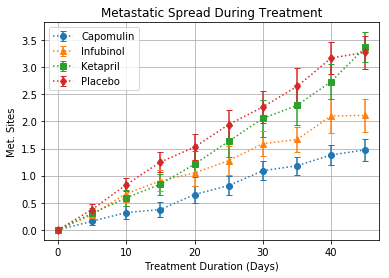

In [23]:
# Generate the plot (with error bars)
fig, ax = plt.subplots()

ax.set_title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")

# X-axis
timepoint = tumor_metsite_mean.index.tolist()
x_axis = np.arange(0, max(timepoint) + 5, 5)

# Y-axis uses samples: Capomulin, Infubinol, Ketapril, Placebo

# Setup
ticks = np.arange(0, max(timepoint) + 5, 10)
ax.set_xticks(ticks)
ax.set_xlim(-2, max(timepoint) + 2)
ax.grid()

count = 0
markers = ['o', '^', 's', 'd']

for s in samples:
    ax.errorbar(x_axis, tumor_metsite_mean[s], tumor_metsite_sem[s], linestyle = ':', 
                 marker =  markers[count], capthick = 1, capsize = 3)
    count += 1

ax.legend()

# Save the figure
plt.savefig("analysis/Treatment_Effects_on_Metastatic_Spread.png")

# Show the figure
plt.show()

### Survival Rates

In [24]:
# Store the count of mice grouped by drug and timepoint, convert groupby object into dataframe, and reset index
tumor_mice_count_group = data_merge_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
tumor_mice_count_df = tumor_mice_count_group.to_frame().reset_index()
tumor_mice_count_df = tumor_mice_count_df.rename(columns={"Mouse ID": "Mouse Count"})

# Preview dataframe
tumor_mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [25]:
# Minor data munging to reformat the dataframes
tumor_mice_count = pd.DataFrame(tumor_mice_count_group)
tumor_mice_count = tumor_mice_count.unstack(level = 0)
tumor_mice_count.columns = tumor_mice_count.columns.get_level_values(1)

# Preview that reformatting worked
tumor_mice_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


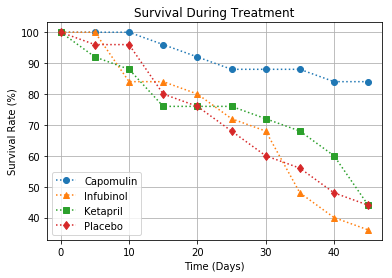

In [26]:
# Generate the plot (accounting for percentages)

# Get percentages
tumor_mice_survival = tumor_mice_count * 100 / tumor_mice_count.iloc[0]

fig, ax = plt.subplots()

ax.set_title("Survival During Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")

# X-axis
timepoint = tumor_mice_count.index.tolist()
x_axis = np.arange(0, max(timepoint) + 5, 5)

# Y-axis uses samples: Capomulin, Infubinol, Ketapril, Placebo

# Setup
ticks = np.arange(0, max(timepoint) + 5, 10)
ax.set_xticks(ticks)
ax.set_xlim(-2, max(timepoint) + 2)
ax.grid()

count = 0
markers = ['o', '^', 's', 'd']

for s in samples:
    ax.plot(x_axis, tumor_mice_survival[s], linestyle = ':', 
                 marker =  markers[count])
    count += 1

ax.legend()

# Save the figure
plt.savefig("analysis/Treatment_Effects_on_Mice_Survival_Rate.png")

# Show the figure
plt.show()

### Summary Bar Graph

In [27]:
# Calculate the percent changes for each drug
tumor_percent_change = (tumor_volume_mean.iloc[9] - tumor_volume_mean.iloc[0]) / tumor_volume_mean.iloc[0] * 100

# Display the data to confirm
tumor_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

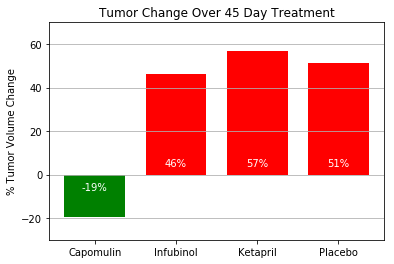

In [28]:
# Store all relevant percent changes into a tuple
relevant_tumor_percent_change = [tumor_percent_change[s] for s in samples]
relevant_tumor_percent_change = tuple(relevant_tumor_percent_change)

# Splice the data between passing and failing drugs
failing_drugs = []
passing_drugs = []

for drug in relevant_tumor_percent_change:
    if drug < 0:
        passing_drugs.append(drug)

    else:
        failing_drugs.append(drug)

# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()

ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")

index = np.arange(len(relevant_tumor_percent_change))
index_end_passing = len(passing_drugs)
index_end_failing = len(failing_drugs) + 1

ax.set_xticks(index)
ax.set_xticklabels(samples)
ax.set_ylim([-30,70])
ax.grid(axis="y")

bar_passing_drugs = ax.bar(index[0:index_end_passing], passing_drugs, width=0.75, color="green")
bar_failing_drugs = ax.bar(index[index_end_passing: index_end_failing], failing_drugs, width=0.75, color="red")

# Use functions to label the percentages of changes
def label_failing_drugs(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, 3,
                f"{height:.0f}%",
                ha='center', va='bottom', color="white")

def label_passing_drugs(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, -8,
                f"{height:.0f}%",
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
label_passing_drugs(bar_passing_drugs)
label_failing_drugs(bar_failing_drugs)

# Save the figure
plt.savefig("analysis/Treatment_Effects_on_Percent_Tumor_Volume_Change.png")

# Show the figure
fig.show()